### Template for NLP project

The aim of the project is to achieve the following:
 - Train a neural network that is **at least better than random guessing** on your dataset. The template contains the IMDB dataset for sentiment analysis, however, you can choose any other language related data set with the appropriate NLP task.
 - Investigate different neural network architectures (different hyperparameters, different layers, different pre-processing). Explain in the presentation, why the final network was selected! **Do not rely on black-box mechanisms.**
 

In [1]:
# tensorflow modules
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LayerNormalization, Dropout, LSTM
import tensorflow

# if you have installed a different version, replace 'r2.6'  with your version in links provided below
print(tensorflow.__version__)

2.8.2


In [2]:
# load imdb dataset
# links to dataset
# original dataset: https://ai.stanford.edu/~amaas/data/sentiment/
# version in tensorflow: https://www.tensorflow.org/versions/r2.6/api_docs/python/tf/keras/datasets/imdb

# select your vocabulary size
vocabularySize = 5000  #5000 most frequent words

# load data (it is already pre-processed)
# optional: add other pre.processing steps like stopword removal
(xTrain, yTrain), (xTest, yTest) = imdb.load_data(num_words=vocabularySize)
print('Loaded dataset with {} training samples, {} test samples'.format(len(xTrain), len(xTest)))

# look at the data
print('---review---')
print(xTrain[123])
print('---label---')
print(yTrain[123])

# look at the respective words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in xTrain[123]])

# other related dataset already in tensorflow:  reuters newswire classification dataset
# see https://www.tensorflow.org/versions/r2.6/api_docs/python/tf/keras/datasets/reuters

Loaded dataset with 25000 training samples, 25000 test samples
---review---
[1, 307, 5, 1301, 20, 1026, 2511, 87, 2775, 52, 116, 5, 31, 7, 4, 91, 1220, 102, 13, 28, 110, 11, 6, 137, 13, 115, 219, 141, 35, 221, 956, 54, 13, 16, 11, 2714, 61, 322, 423, 12, 38, 76, 59, 1803, 72, 8, 2, 23, 5, 967, 12, 38, 85, 62, 358, 99]
---label---
1
---review with words---
['the', 'version', 'to', 'date', 'on', 'list', 'draw', 'him', 'critical', 'very', 'love', 'to', 'by', 'br', 'of', 'its', 'tony', 'characters', 'was', 'one', 'life', 'this', 'is', 'go', 'was', 'best', 'least', 'should', 'so', 'done', 'result', 'no', 'was', 'with', 'this', 'understood', 'only', 'war', "couldn't", 'that', 'her', 'get', 'would', 'johnny', 'we', 'in', 'and', 'are', 'to', 'business', 'that', 'her', 'because', 'story', 'use', 'movies']


In [3]:
print(xTrain)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [4]:
# get properties of the dataset
print('Maximum train review length: {}'.format(len(max(xTrain, key=len))))
print('Maximum test review length: {}'.format(len(max(xTest, key=len))))
print('Minimum train review length: {}'.format(len(min(xTrain, key=len))))
print('Minimum test review length: {}'.format(len(min(xTest, key=len))))

Maximum train review length: 2494
Maximum test review length: 2315
Minimum train review length: 11
Minimum test review length: 7


In [5]:
# select maximum number of words as input lengt
# pad or truncated (this is done automatically) your data
maxWords = 1000
xTrain = sequence.pad_sequences(xTrain, maxlen=maxWords)
xTest = sequence.pad_sequences(xTest, maxlen=maxWords)

In [6]:
# setup the neural network architecture
# check out the respective tensorflow help page: https://www.tensorflow.org/guide/keras/rnn
model=Sequential()

# define size of embedding, see https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/Embedding
# optional: use a different embedding like word2vec or other options available within tensorflow 
embeddingSize = 128 # dimension of vector to represent a word
model.add(Embedding(vocabularySize, embeddingSize, input_length=maxWords))

# add recurrent layers: 
# e.g. a SimpleRNN (https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/SimpleRNN) with
# LayerNormalization (https://www.tensorflow.org/versions/r2.9/api_docs/python/tf/keras/layers/LayerNormalization)
model.add(LSTM(64, return_sequences=True)) 
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))

# add layer for output
model.add(Dense(1, activation='sigmoid'))

# print model and check number of parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 128)         640000    
                                                                 
 lstm (LSTM)                 (None, 1000, 64)          49408     
                                                                 
 dropout (Dropout)           (None, 1000, 64)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 722,497
Trainable params: 722,497
Non-trai

In [7]:
# set parameters for network training
batchSize = 64
numEpochs = 5

# train your model
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
xValid, yValid = xTrain[:batchSize], yTrain[:batchSize]
xTrain2, yTrain2 = xTrain[batchSize:], yTrain[batchSize:]
hist = model.fit(xTrain2, yTrain2, validation_data=(xValid, yValid), batch_size=batchSize, epochs=numEpochs)

# check result
scores = model.evaluate(xTest, yTest, verbose=0)
print('Test accuracy:', scores[1])

model.save("model_070622_lstm_do")

Epoch 1/5
390/390 [==============================] - 31s 70ms/step - loss: 0.4072 - accuracy: 0.8111 - val_loss: 0.2545 - val_accuracy: 0.9062
Epoch 2/5
390/390 [==============================] - 27s 68ms/step - loss: 0.2527 - accuracy: 0.9023 - val_loss: 0.1862 - val_accuracy: 0.9375
Epoch 3/5
390/390 [==============================] - 27s 70ms/step - loss: 0.2119 - accuracy: 0.9205 - val_loss: 0.2123 - val_accuracy: 0.9062
Epoch 4/5
390/390 [==============================] - 28s 71ms/step - loss: 0.1751 - accuracy: 0.9363 - val_loss: 0.1625 - val_accuracy: 0.9531
Epoch 5/5
390/390 [==============================] - 26s 68ms/step - loss: 0.1575 - accuracy: 0.9433 - val_loss: 0.2243 - val_accuracy: 0.9062
Test accuracy: 0.8722000122070312


INFO:tensorflow:Assets written to: model_070622_lstm_do/assets


INFO:tensorflow:Assets written to: model_070622_lstm_do/assets


In [8]:
!nvidia-smi

Tue Jun  7 19:02:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    33W /  70W |   1200MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

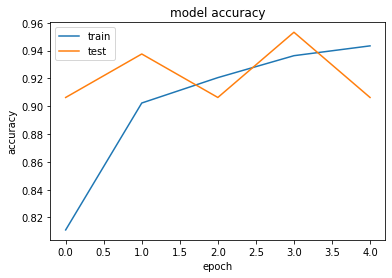

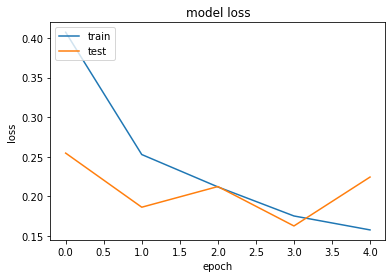

In [9]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
